In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df_1 = pd.read_csv("../data/electricity-sell-price.csv", delimiter=";", decimal=",")
df_2 = pd.read_csv("../data/electricity-exchange-price.csv", delimiter=";", decimal=",")
df_3 = pd.read_csv("../data/electricity-tax-price.csv", delimiter=";", decimal=",")


df_1.head()

,Timestamp,K1,K2,L1,L2,M1,M2
0,01/01/1997,4.82,4.38,3.45,2.77,4.26,3.66
1,01/02/1997,4.82,4.38,3.45,2.77,4.26,3.66
2,01/03/1997,4.82,4.38,3.45,2.77,4.26,3.66
3,01/04/1997,4.83,4.39,3.42,2.75,4.28,3.65
4,01/05/1997,4.83,4.39,3.42,2.75,4.28,3.65


In [39]:
df_1["Timestamp"] = pd.to_datetime(df_1["Timestamp"])
df_1.set_index("Timestamp", inplace=True)

df_2["Timestamp"] = pd.to_datetime(df_2["Timestamp"])
df_2.set_index("Timestamp", inplace=True)

df_3["Timestamp"] = pd.to_datetime(df_3["Timestamp"])
df_3.set_index("Timestamp", inplace=True)

df_1.head()

,K1,K2,L1,L2,M1,M2
Timestamp,,,,,,
1997-01-01,4.82,4.38,3.45,2.77,4.26,3.66
1997-01-02,4.82,4.38,3.45,2.77,4.26,3.66
1997-01-03,4.82,4.38,3.45,2.77,4.26,3.66
1997-01-04,4.83,4.39,3.42,2.75,4.28,3.65
1997-01-05,4.83,4.39,3.42,2.75,4.28,3.65


In [50]:
for i in [df_1, df_2, df_3]:
    print(i.isna().sum())

K1    13
K2    13
L1    13
L2    13
M1    13
M2    13
dtype: int64
K1     13
K2     13
L1     13
L2     13
M1     13
M2     13
T1    143
T2    143
T3    143
T4    143
dtype: int64
ALV           0
Sähkövero1    0
Sähkövero2    0
dtype: int64


In [51]:
df_1.fillna(0, inplace=True)
df_2.fillna(0, inplace=True)

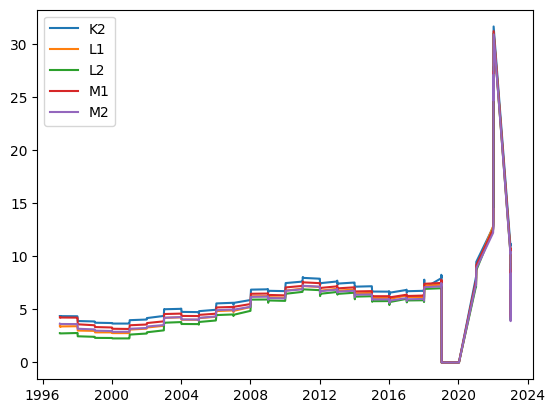

In [52]:
for i in df_1.columns[1:]:
    plt.plot(df_1.index, df_1[i], label=i)
    
plt.legend()
plt.show()

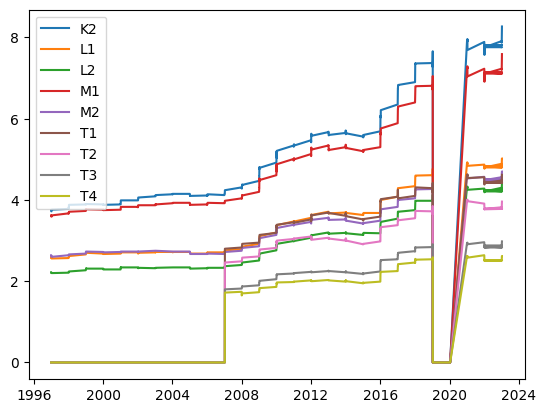

In [53]:
for i in df_2.columns[1:]:
    plt.plot(df_2.index, df_2[i], label=i)
    
plt.legend()
plt.show()

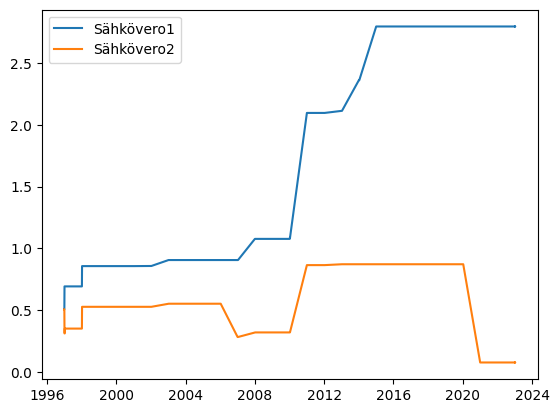

In [54]:
for i in df_3.columns[1:]:
    plt.plot(df_3.index, df_3[i], label=i)
    
plt.legend()
plt.show()

In [55]:
X, y = df_1.drop(columns=["K1"], axis=1), df_1["K1"]

X.head()

,K2,L1,L2,M1,M2
Timestamp,,,,,
1997-01-01,4.38,3.45,2.77,4.26,3.66
1997-01-02,4.38,3.45,2.77,4.26,3.66
1997-01-03,4.38,3.45,2.77,4.26,3.66
1997-01-04,4.39,3.42,2.75,4.28,3.65
1997-01-05,4.39,3.42,2.75,4.28,3.65


In [159]:
import numpy as np

X, y = df_1.index.values.astype(np.int64) / int(1e6), df_1.reset_index(drop=True)

X

array([8.5207680e+11, 8.5216320e+11, 8.5224960e+11, 8.5233600e+11,
       8.5242240e+11, 8.5250880e+11, 8.5259520e+11, 8.5268160e+11,
       8.5276800e+11, 8.5285440e+11, 8.5294080e+11, 8.5302720e+11,
       8.8361280e+11, 8.8369920e+11, 8.8378560e+11, 8.8387200e+11,
       8.8395840e+11, 8.8404480e+11, 8.8413120e+11, 8.8421760e+11,
       8.8430400e+11, 8.8439040e+11, 8.8447680e+11, 8.8456320e+11,
       9.1514880e+11, 9.1523520e+11, 9.1532160e+11, 9.1540800e+11,
       9.1549440e+11, 9.1558080e+11, 9.1566720e+11, 9.1575360e+11,
       9.1584000e+11, 9.1592640e+11, 9.1601280e+11, 9.1609920e+11,
       9.4668480e+11, 9.4677120e+11, 9.4685760e+11, 9.4694400e+11,
       9.4703040e+11, 9.4711680e+11, 9.4720320e+11, 9.4728960e+11,
       9.4737600e+11, 9.4746240e+11, 9.4754880e+11, 9.4763520e+11,
       9.7830720e+11, 9.7839360e+11, 9.7848000e+11, 9.7856640e+11,
       9.7865280e+11, 9.7873920e+11, 9.7882560e+11, 9.7891200e+11,
       9.7899840e+11, 9.7908480e+11, 9.7917120e+11, 9.7925760e

In [160]:
from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=2,
    #gap=10,
    #max_train_size=250,
    test_size=100,
)

all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]

#X.iloc[test_0]

In [162]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

model = HistGradientBoostingRegressor(
    # categorical_features=categorical_columns,
    random_state=42,
)
# model = GradientBoostingRegressor(
#     random_state=42,
# )

# model.fit(X.iloc[train_0], y.iloc[train_0])
model.fit(np.array([X[i] for i in train_0]).reshape(-1, 1), y.iloc[train_0])

def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


evaluate(model, X, y, cv=ts_cv)


ValueError: y should be a 1d array, got an array of shape (121, 6) instead.

In [111]:
y_pred = model.predict(X.iloc[test_0])
y_pred_train = model.predict(X)
y_pred

array([6.18181551, 6.18181551, 6.18181551, 6.18181551, 6.18181551,
       6.18181551, 6.18181551, 6.18181551, 6.18181551, 6.18181551,
       6.18181551, 6.18181551, 6.18181551, 6.18181551, 6.18181551,
       6.18181551, 6.18181551, 6.18181551, 6.18181551, 6.18181551,
       6.18181551, 6.18181551, 6.18181551, 6.18181551, 6.18181551,
       6.18181551, 6.18181551, 6.18181551, 6.18181551, 6.18181551,
       6.18181551, 6.18181551, 6.18181551, 6.18181551, 6.18181551,
       6.18181551, 6.18181551, 6.18181551, 6.18181551, 6.18181551,
       6.18181551, 6.18181551, 6.18181551, 6.18181551, 6.18181551,
       6.18181551, 6.18181551, 6.18181551, 6.18181551, 6.18181551,
       6.18181551, 6.18181551, 6.18181551, 6.18181551, 6.18181551,
       6.18181551, 6.18181551, 6.18181551, 6.18181551, 6.18181551,
       6.18181551, 6.18181551, 6.18181551, 6.18181551, 6.18181551,
       6.18181551, 6.18181551, 6.18181551, 6.18181551, 6.18181551,
       6.18181551, 6.18181551, 6.18181551, 6.18181551, 6.18181

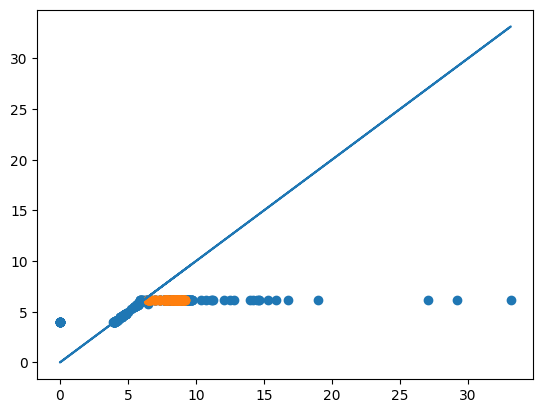

In [112]:
plt.plot(y, y)
plt.scatter(y, y_pred_train)
plt.scatter(y.iloc[test_0], y_pred)

plt.show()

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# forest = RandomForestRegressor(max_depth=2, random_state=0)
model = MultiOutputRegressor(RandomForestRegressor(max_depth=2, random_state=0))

#forest.fit(X, y)
#model.fit(np.array([X[i] for i in train_0]).reshape(-1, 1), y.iloc[train_0])
model.fit(X.reshape(-1, 1), y)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=2,
                                                     random_state=0))

ValueError: x and y must be the same size

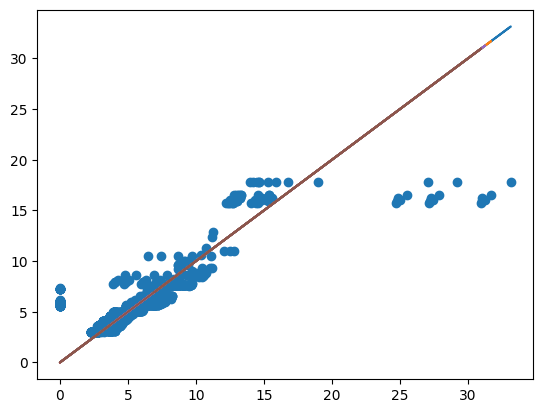

In [225]:
#y_pred = model.predict(X.iloc[test_0])
t = X.reshape(-1,1)
y_pred = model.predict(t)
y_pred_train = model.predict(t)

plt.plot(y, y)
plt.scatter(y, y_pred_train)
plt.scatter(y.iloc[test_0], y_pred)

plt.show()

In [202]:
y_pred_train.reshape(6, -1)

array([[4.97249149, 4.54690957, 3.56719784, ..., 4.97249149, 4.54690957,
        3.56719784],
       [3.01213264, 4.13962602, 3.66985733, ..., 3.10629417, 4.18945811,
        3.73664072],
       [5.07800525, 4.59890267, 3.64062178, ..., 7.6252511 , 6.53953145,
        5.96281317],
       [5.67916196, 6.15627485, 5.85084998, ..., 5.67916196, 6.15627485,
        5.85084998],
       [7.6252511 , 6.53953145, 5.96281317, ..., 7.6252511 , 6.53953145,
        5.96281317],
       [5.67916196, 6.15627485, 5.85084998, ..., 7.96815267, 8.09142208,
        7.74183348]])

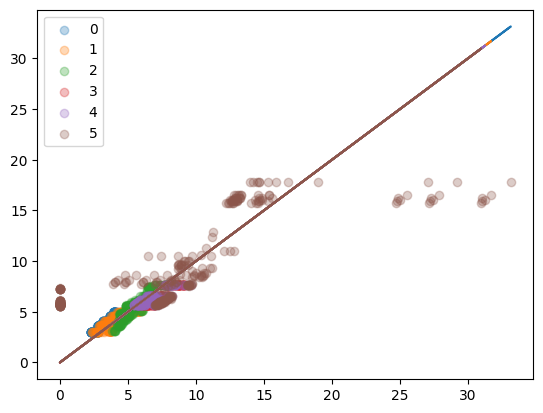

In [226]:
y_meme = y_pred_train.reshape(6, -1)

plt.plot(y, y)
for i in range(0,6):
    plt.scatter(y.values.reshape(6, -1)[i], y_meme[i], label=i, alpha=0.3)
    
plt.legend()
plt.show()

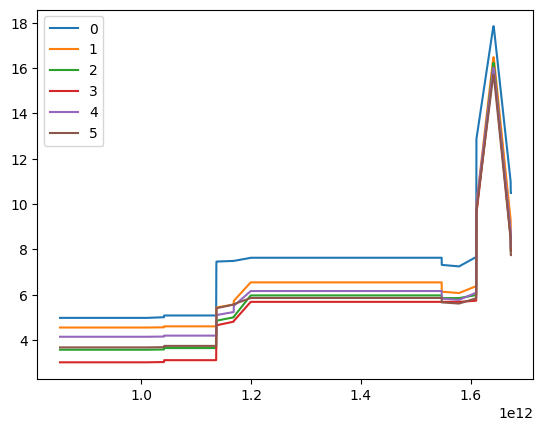

In [227]:
test = pd.DataFrame(y_pred)

#test.plot(kind="line", x=t)
for i in test.columns:
    # plt.scatter(t, test[i], label=i)
    plt.plot(t, test[i], label=i)
plt.legend()
plt.show()

In [237]:
y.iloc[:,0]

0       4.82
1       4.82
2       4.82
3       4.83
4       4.83
       ...  
316     6.50
317     8.71
318     7.41
319    11.13
320     9.69
Name: K1, Length: 321, dtype: float64

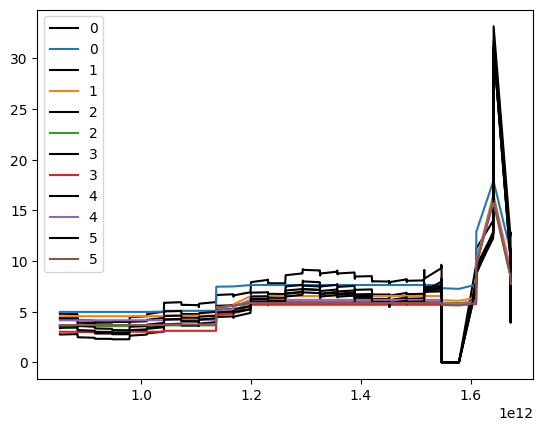

In [238]:
t = X.reshape(-1,1)
y_pred = model.predict(t)
test = pd.DataFrame(y_pred)


for i in test.columns:
    # plt.scatter(t, test[i], label=i)
    plt.plot(t, y.iloc[:,i], label=i, color="black")
    
    plt.plot(t, test[i], label=i)
plt.legend()
plt.show()